# **Modules imports**

In [ ]:
import numpy as np

import keras
from keras import layers

import matplotlib.pyplot as plt

# **Question 2**

In [ ]:
# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Model 1: Simple Dense Network

In [ ]:
def create_dense_model():
    model_dense = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="tanh"),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model_dense

### Model 2: Convolutional Network

In [ ]:
def create_conv_model():
    model_conv = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Flatten(),  # Need to flatten before dense layer
        keras.layers.Dense(10, activation="softmax")
    ])
    return model_conv

In [ ]:
dense_model = create_dense_model()
conv_model = create_conv_model()

dense_params = dense_model.count_params()
conv_params = conv_model.count_params()

print(f"Number of parameters in dense model: {dense_params}")
print(f"Number of parameters in convolutional model: {conv_params}")


Number of parameters in dense model: 7960
Number of parameters in convolutional model: 57870


In [ ]:
dense_model.summary()
conv_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          57,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,870 (226.05 KB)

 Trainable params: 57,870 (226.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_dense_model_duplicated():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="tanh"),
        keras.layers.Dense(10, activation="tanh"),  # Duplicated layer
        keras.layers.Dense(10, activation="softmax")
    ])
    return model

In [ ]:
def create_conv_model_duplicated():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),  # Duplicated layer
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model

In [ ]:
dense_model_duplicated = create_dense_model_duplicated()
conv_model_duplicated = create_conv_model_duplicated()

dense_params_duplicated = dense_model_duplicated.count_params()
conv_params_duplicated = conv_model_duplicated.count_params()

print(f"Number of parameters in duplicated dense model: {dense_params_duplicated}")
print(f"Number of parameters in duplicated convolutional model: {conv_params_duplicated}")

dense_model_duplicated.summary()
conv_model_duplicated.summary()


Number of parameters in duplicated dense model: 8070
Number of parameters in duplicated convolutional model: 42780


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 10)          │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          40,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,780 (167.11 KB)

 Trainable params: 42,780 (167.11 KB)

 Non-trainable params: 0 (0.00 B)

## Question 3

In [ ]:
def create_conv_model_q3():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Conv2D(10, kernel_size=(5, 5), strides=1, padding="valid"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model

In [ ]:
model3 = create_conv_model_q3()
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 10)          │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 10)          │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 10)          │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 10)            │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 10)            │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,420 (56.33 KB)

 Trainable params: 14,420 (56.33 KB)

 Non-trainable params: 0 (0.00 B)

# **Question 5**

In [ ]:
# Function to pad randomly input examples
def loc_noise(data, rnd=True):
  shifted = np.zeros((data.shape[0],56,56))
  for ex in range(len(data)):
    ud = np.random.randint(0,28)
    lr = np.random.randint(0,28)
    padded = data[ex]
    if rnd: padded = np.pad(data[ex], ((ud, 28-ud), (lr, 28-lr)))
    else: padded = np.pad(data[ex], ((28,0),(28,0)))
    shifted[ex] = padded
  return shifted

In [ ]:
def loc_noise(x, y, rnd=False):
    # x shape is (n, 28, 28, 1) for MNIST
    n = x.shape[0]
    x_aug = np.zeros((n, 56, 56, 1))

    for i in range(n):
        if rnd:
            # Random placement within the 56x56 area
            top = np.random.randint(0, 29)  # 0 to 28
            left = np.random.randint(0, 29)  # 0 to 28
        else:
            # Bottom-right placement
            top = 28
            left = 28

        x_aug[i, top:top+28, left:left+28, :] = x[i]

    return x_aug, y

In [ ]:
# Define the VGG block
def vgg_block(x):
    x = keras.layers.Conv2D(8, kernel_size=(5, 5), strides=1, padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(8, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    return x

In [ ]:
# Basic model with one VGG block
def create_basic_model(input_shape=(56, 56, 1), num_classes=10):
    inputs = keras.Input(shape=input_shape)

    # Single VGG block
    x = vgg_block(inputs)

    # Flatten layer
    x = keras.layers.Flatten()(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
# Model with multiple VGG blocks
def create_deep_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3):
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Multiple VGG blocks
    for _ in range(num_blocks):
        x = vgg_block(x)

    # Flatten layer
    x = keras.layers.Flatten()(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
# Start over with fresh data before adding noise
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Apply data augmentation
x_train_aug, y_train_aug = loc_noise(x_train, y_train, rnd=False)  # Bottom-right placement for train
x_test_aug, y_test_aug = loc_noise(x_test, y_test, rnd=True)  # Random placement for test

In [ ]:
# Model 1: Basic model with one VGG block
model1 = create_basic_model()
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("Training basic model with one VGG block...")
model1.fit(x_train_aug, y_train_aug, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate on test set
print("Evaluating basic model on test set...")
test_loss1, test_acc1 = model1.evaluate(x_test_aug, y_test_aug)
print(f"Test accuracy with one VGG block: {test_acc1:.4f}")

Training basic model with one VGG block...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7892 - loss: 0.8002 - val_accuracy: 0.9703 - val_loss: 0.1162
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9630 - loss: 0.1247 - val_accuracy: 0.9780 - val_loss: 0.0810
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9721 - loss: 0.0923 - val_accuracy: 0.9812 - val_loss: 0.0672
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0730 - val_accuracy: 0.9832 - val_loss: 0.0611
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9797 - loss: 0.0654 - val_accuracy: 0.9848 - val_loss: 0.0624
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9850 - val_loss: 0.0565
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9843 - val_loss: 0.0538
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accura

In [ ]:
# Model 2: Deep model with multiple VGG blocks
model2 = create_deep_model(num_blocks=3)
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("Training deep model with three VGG blocks...")
model2.fit(x_train_aug, y_train_aug, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate on test set
print("Evaluating deep model on test set...")
test_loss2, test_acc2 = model2.evaluate(x_test_aug, y_test_aug)
print(f"Test accuracy with three VGG blocks: {test_acc2:.4f}")

Training deep model with three VGG blocks...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6682 - loss: 1.0069 - val_accuracy: 0.9598 - val_loss: 0.1360
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9529 - loss: 0.1543 - val_accuracy: 0.9677 - val_loss: 0.1180
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9672 - loss: 0.1060 - val_accuracy: 0.9720 - val_loss: 0.0901
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9748 - loss: 0.0814 - val_accuracy: 0.9785 - val_loss: 0.0729
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9791 - loss: 0.0693 - val_accuracy: 0.9807 - val_loss: 0.0682
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9820 - loss: 0.0591 - val_accuracy: 0.9835 - val_loss: 0.0594
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step -

# **Question 6**

In [ ]:
# Define the ResNet block using functional API
def resnet_block(x):
    # First convolution
    conv1 = keras.layers.Conv2D(8, kernel_size=(5, 5), strides=1, padding="same", activation="relu")(x)

    # Second convolution with no activation
    conv2 = keras.layers.Conv2D(8, kernel_size=(5, 5), strides=1, padding="same")(conv1)

    # Skip connection with 1x1 convolution
    skip = keras.layers.Conv2D(8, kernel_size=(1, 1), strides=1, padding="same", activation="relu")(x)

    # Add the second convolution and skip connection
    added = keras.layers.add([conv2, skip])

    # Apply activation after addition
    output = keras.layers.Activation("relu")(added)

    return output

In [ ]:
# Create ResNet model with three ResNet blocks
def create_resnet_model(input_shape=(56, 56, 1), num_classes=10):
    inputs = keras.Input(shape=input_shape)

    # First ResNet block
    x = resnet_block(inputs)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Second ResNet block
    x = resnet_block(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Third ResNet block
    x = resnet_block(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Flatten and output layers
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
# VGG block (from previous implementation)
def vgg_block(x):
    x = keras.layers.Conv2D(8, kernel_size=(5, 5), strides=1, padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(8, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    return x

# Create VGG model with three VGG blocks
def create_vgg_model(input_shape=(56, 56, 1), num_classes=10):
    inputs = keras.Input(shape=input_shape)

    # Three VGG blocks
    x = vgg_block(inputs)
    x = vgg_block(x)
    x = vgg_block(x)

    # Flatten and output layers
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
# Training and evaluation code
def compare_models():
    # Load and prepare the data
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    # Reshape and normalize
    x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

    # Convert labels to one-hot encoded vectors
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    # Apply data augmentation
    x_train_aug, y_train_aug = loc_noise(x_train, y_train, rnd=False)  # Bottom-right placement for train
    x_test_aug, y_test_aug = loc_noise(x_test, y_test, rnd=True)  # Random placement for test

    # Create and compile VGG model
    vgg_model = create_vgg_model()
    vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Train VGG model
    print("Training VGG model...")
    vgg_history = vgg_model.fit(
        x_train_aug, y_train_aug,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=1
    )

    # Evaluate VGG model on test set
    vgg_test_loss, vgg_test_acc = vgg_model.evaluate(x_test_aug, y_test_aug)
    print(f"VGG model test accuracy: {vgg_test_acc:.4f}")

    # Create and compile ResNet model
    resnet_model = create_resnet_model()
    resnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Train ResNet model
    print("Training ResNet model...")
    resnet_history = resnet_model.fit(
        x_train_aug, y_train_aug,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=1
    )

    # Evaluate ResNet model on test set
    resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_aug, y_test_aug)
    print(f"ResNet model test accuracy: {resnet_test_acc:.4f}")

    # Compare results
    print(f"\nPerformance comparison:")
    print(f"VGG model accuracy: {vgg_test_acc:.4f}")
    print(f"ResNet model accuracy: {resnet_test_acc:.4f}")
    print(f"Difference (ResNet - VGG): {resnet_test_acc - vgg_test_acc:.4f}")

if __name__ == "__main__":
    compare_models()

Training VGG model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6723 - loss: 0.9503 - val_accuracy: 0.9630 - val_loss: 0.1259
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9589 - loss: 0.1320 - val_accuracy: 0.9792 - val_loss: 0.0742
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9716 - loss: 0.0921 - val_accuracy: 0.9740 - val_loss: 0.0873
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9757 - loss: 0.0780 - val_accuracy: 0.9840 - val_loss: 0.0561
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9795 - loss: 0.0652 - val_accuracy: 0.9862 - val_loss: 0.0498
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9855 - val_loss: 0.0557
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9872 - val_loss: 0.0455
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9851 - loss: 0

## Optional

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def inception_module(x, filters=8):
    """
    Implements a basic Inception module with four parallel paths:
    1. 1x1 convolution
    2. 1x1 convolution followed by 3x3 convolution
    3. 1x1 convolution followed by 5x5 convolution
    4. 3x3 max pooling followed by 1x1 convolution
    """
    # 1x1 convolution branch
    conv_1x1 = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                   padding='same', activation='relu')(x)

    # 1x1 -> 3x3 convolution branch
    conv_3x3_reduce = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                         padding='same', activation='relu')(x)
    conv_3x3 = keras.layers.Conv2D(filters, kernel_size=(3, 3),
                                  padding='same', activation='relu')(conv_3x3_reduce)

    # 1x1 -> 5x5 convolution branch
    conv_5x5_reduce = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                         padding='same', activation='relu')(x)
    conv_5x5 = keras.layers.Conv2D(filters, kernel_size=(5, 5),
                                  padding='same', activation='relu')(conv_5x5_reduce)

    # 3x3 max pooling -> 1x1 convolution branch
    max_pool = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1),
                                        padding='same')(x)
    pool_proj = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                   padding='same', activation='relu')(max_pool)

    # Concatenate all branches along the filter dimension
    output = keras.layers.Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])

    return output

In [ ]:
import tensorflow as tf
from tensorflow import keras

def vgg_block(x, filters=8):
    """
    VGG block with two convolutional layers and a max pooling layer
    """
    # First convolution
    x = keras.layers.Conv2D(filters, kernel_size=(5, 5),
                          strides=1, padding="same", activation="relu")(x)

    # Second convolution
    x = keras.layers.Conv2D(filters, kernel_size=(3, 3),
                          strides=1, padding="same", activation="relu")(x)

    # Max pooling
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    return x

def resnet_block(x, filters=8):
    """
    ResNet block with skip connection
    """
    # Store input for skip connection
    skip = x

    # First convolution
    conv1 = keras.layers.Conv2D(filters, kernel_size=(5, 5),
                              strides=1, padding="same", activation="relu")(x)

    # Second convolution with no activation
    conv2 = keras.layers.Conv2D(filters, kernel_size=(5, 5),
                              strides=1, padding="same")(conv1)

    # Skip connection with 1x1 convolution if dimensions don't match
    if x.shape[-1] != filters:
        skip = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                 strides=1, padding="same", activation="relu")(x)

    # Add the second convolution and skip connection
    added = keras.layers.add([conv2, skip])

    # Apply activation after addition
    output = keras.layers.Activation("relu")(added)

    return output

def inception_module(x, filters=8):
    """
    Implements a basic Inception module with four parallel paths
    """
    # 1x1 convolution branch
    conv_1x1 = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                 padding='same', activation='relu')(x)

    # 1x1 -> 3x3 convolution branch
    conv_3x3_reduce = keras.layers.Conv2D(filters//2, kernel_size=(1, 1),
                                        padding='same', activation='relu')(x)
    conv_3x3 = keras.layers.Conv2D(filters, kernel_size=(3, 3),
                                 padding='same', activation='relu')(conv_3x3_reduce)

    # 1x1 -> 5x5 convolution branch
    conv_5x5_reduce = keras.layers.Conv2D(filters//2, kernel_size=(1, 1),
                                        padding='same', activation='relu')(x)
    conv_5x5 = keras.layers.Conv2D(filters, kernel_size=(5, 5),
                                 padding='same', activation='relu')(conv_5x5_reduce)

    # 3x3 max pooling -> 1x1 convolution branch
    max_pool = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1),
                                       padding='same')(x)
    pool_proj = keras.layers.Conv2D(filters, kernel_size=(1, 1),
                                  padding='same', activation='relu')(max_pool)

    # Concatenate all branches along the filter dimension
    output = keras.layers.Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])

    return output

In [ ]:
import numpy as np

def loc_noise(x, y, rnd=False):
    """
    Pads images with zeros, effectively doubling their size.
    Places the original image in the bottom-right corner (rnd=False)
    or randomly in the 56x56 space (rnd=True).
    """
    # x shape is (n, 28, 28, 1) for MNIST
    n = x.shape[0]
    x_aug = np.zeros((n, 56, 56, 1))

    for i in range(n):
        if rnd:
            # Random placement within the 56x56 area
            top = np.random.randint(0, 29)  # 0 to 28
            left = np.random.randint(0, 29)  # 0 to 28
        else:
            # Bottom-right placement
            top = 28
            left = 28

        x_aug[i, top:top+28, left:left+28, :] = x[i]

    return x_aug, y

In [ ]:
import tensorflow as tf
from tensorflow import keras

def create_vgg_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create a VGG-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack VGG blocks
    for i in range(num_blocks):
        x = vgg_block(x, filters * (2**min(i, 2)))

    # Flatten and dense layers
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

def create_resnet_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create a ResNet-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack ResNet blocks
    for i in range(num_blocks):
        x = resnet_block(x, filters * (2**min(i, 2)))
        if i < num_blocks - 1:  # Add max pooling after each block except the last
            x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Final pooling, flatten and dense layers
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

def create_inception_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create an Inception-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack Inception blocks
    for i in range(num_blocks):
        x = inception_module(x, filters * (2**min(i, 2)))
        if i < num_blocks - 1:  # Add max pooling after each block except the last
            x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Final pooling, flatten and dense layers
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# ... (vgg_block, resnet_block, inception_module, loc_noise functions remain the same) ...

def create_vgg_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create a VGG-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack VGG blocks
    for i in range(num_blocks):
        x = vgg_block(x, filters * (2**min(i, 2)))
        # Check if feature map size is too small for further pooling
        if x.shape[1] < 2 or x.shape[2] < 2:  # Height or width less than 2
            break  # Stop adding more blocks

    # Flatten and dense layers
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

def create_resnet_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create a ResNet-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack ResNet blocks
    for i in range(num_blocks):
        x = resnet_block(x, filters * (2**min(i, 2)))
        if i < num_blocks - 1:  # Add max pooling after each block except the last
            # Check if feature map size is too small for further pooling
            if x.shape[1] >= 2 and x.shape[2] >= 2:  # Height and width at least 2
                x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
            else:
                break  # Stop adding more blocks

    # Final pooling, flatten and dense layers
    if x.shape[1] >= 2 and x.shape[2] >= 2:  # Height and width at least 2
        x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

def create_inception_model(input_shape=(56, 56, 1), num_classes=10, num_blocks=3, filters=8):
    """Create an Inception-style model with the specified number of blocks"""
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Stack Inception blocks
    for i in range(num_blocks):
        x = inception_module(x, filters * (2**min(i, 2)))
        if i < num_blocks - 1:  # Add max pooling after each block except the last
            # Check if feature map size is too small for further pooling
            if x.shape[1] >= 2 and x.shape[2] >= 2:  # Height and width at least 2
                x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
            else:
                break  # Stop adding more blocks

    # Final pooling, flatten and dense layers
    if x.shape[1] >= 2 and x.shape[2] >= 2:  # Height and width at least 2
        x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

# ... (compare_architecture_performance function remains the same) ...


--- Testing models with 3 blocks ---
Training VGG model with 3 blocks...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7751 - loss: 0.7119 - val_accuracy: 0.9777 - val_loss: 0.0824
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9722 - loss: 0.0873 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9837 - loss: 0.0535 - val_accuracy: 0.9858 - val_loss: 0.0433
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9888 - val_loss: 0.0376
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 0.9895 - val_loss: 0.0350
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9897 - val_loss: 0.0338
Epoch 8/10
422/422 ━━━

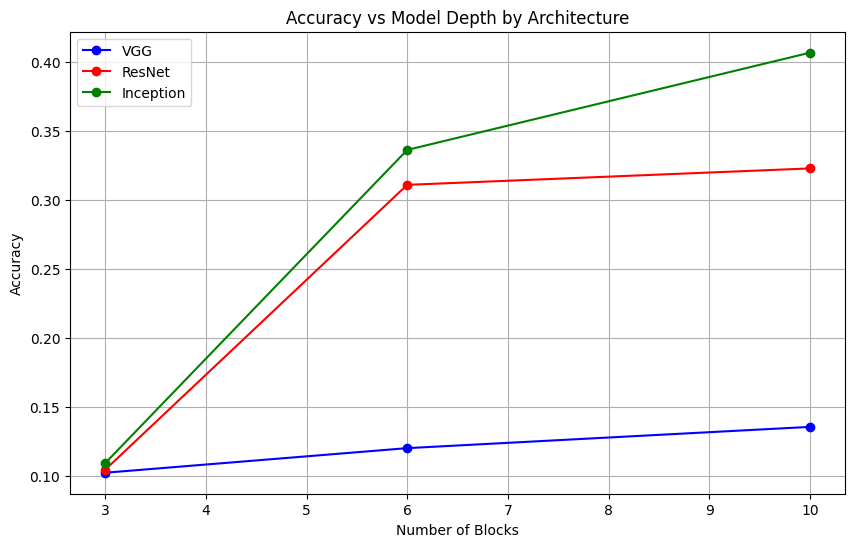


--- Performance Summary ---
Depth | VGG      | ResNet   | Inception
----------------------------------------
    3 | 0.1026 | 0.1048 | 0.1096
    6 | 0.1204 | 0.3111 | 0.3364
   10 | 0.1358 | 0.3230 | 0.4068


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def compare_architecture_performance():
    # Load and prepare the data
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    # Reshape and normalize
    x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

    # Convert labels to one-hot encoded vectors
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    # Apply data augmentation
    x_train_aug, y_train_aug = loc_noise(x_train, y_train, rnd=False)  # Bottom-right placement for train
    x_test_aug, y_test_aug = loc_noise(x_test, y_test, rnd=True)       # Random placement for test

    # Initialize results storage
    depths = [3, 6, 10]  # Different depths to test
    vgg_accuracies = []
    resnet_accuracies = []
    inception_accuracies = []

    # Test each depth
    for depth in depths:
        print(f"\n--- Testing models with {depth} blocks ---")

        # VGG Model
        print(f"Training VGG model with {depth} blocks...")
        vgg_model = create_vgg_model(num_blocks=depth)
        vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        vgg_model.fit(
            x_train_aug, y_train_aug,
            epochs=10,
            batch_size=128,
            validation_split=0.1,
            verbose=1
        )
        _, vgg_acc = vgg_model.evaluate(x_test_aug, y_test_aug)
        vgg_accuracies.append(vgg_acc)
        print(f"VGG accuracy with {depth} blocks: {vgg_acc:.4f}")

        # ResNet Model
        print(f"Training ResNet model with {depth} blocks...")
        resnet_model = create_resnet_model(num_blocks=depth)
        resnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        resnet_model.fit(
            x_train_aug, y_train_aug,
            epochs=10,
            batch_size=128,
            validation_split=0.1,
            verbose=1
        )
        _, resnet_acc = resnet_model.evaluate(x_test_aug, y_test_aug)
        resnet_accuracies.append(resnet_acc)
        print(f"ResNet accuracy with {depth} blocks: {resnet_acc:.4f}")

        # Inception Model
        print(f"Training Inception model with {depth} blocks...")
        inception_model = create_inception_model(num_blocks=depth)
        inception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        inception_model.fit(
            x_train_aug, y_train_aug,
            epochs=10,
            batch_size=128,
            validation_split=0.1,
            verbose=1
        )
        _, inception_acc = inception_model.evaluate(x_test_aug, y_test_aug)
        inception_accuracies.append(inception_acc)
        print(f"Inception accuracy with {depth} blocks: {inception_acc:.4f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(depths, vgg_accuracies, 'bo-', label='VGG')
    plt.plot(depths, resnet_accuracies, 'ro-', label='ResNet')
    plt.plot(depths, inception_accuracies, 'go-', label='Inception')
    plt.xlabel('Number of Blocks')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Model Depth by Architecture')
    plt.legend()
    plt.grid(True)
    plt.savefig('architecture_comparison.png')
    plt.show()

    # Print summary
    print("\n--- Performance Summary ---")
    print("Depth | VGG      | ResNet   | Inception")
    print("-" * 40)
    for i, depth in enumerate(depths):
        print(f"{depth:5d} | {vgg_accuracies[i]:.4f} | {resnet_accuracies[i]:.4f} | {inception_accuracies[i]:.4f}")

if __name__ == "__main__":
    compare_architecture_performance()